- Confusion Matrix
- Accuracy Score
- Precision
- Recall
- F1 Score
- Plotting points on a AUC Curve

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
y_test = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]


In [80]:
class evalution_matrix:
  def __init__(self, y_test,y_pred):
        self.y_test= y_test
        self.y_pred= y_pred
        self.true_positive = []
        self.false_negative = []
        self.false_positive = []
        self.true_negative = []

  def confusion_Matrix(self, y_test,y_pred):
      for i in range(len(self.y_test)):
        if self.y_pred[i] == 1:  # True
          if self.y_test[i]==1: # positive
            self.true_positive.append(i)
          else : # negative
            self.false_positive.append(i) 

        elif self.y_pred[i] == 0:  # False
          if self.y_test[i] == 1: # positive
            self.true_negative.append(i)
          else: # negative
            self.false_negative.append(i)

      self.confusion_mat = {"True positive":self.true_positive,'True negative':self.true_negative,'False positive':self.false_positive,'False negative': self.false_negative}
      self.confusion_matrix = [[len(self.true_negative),len(self.false_positive)],[len(self.true_positive),len(self.false_negative)]]
      return self.confusion_matrix

  def heatmap_matrix(self,y_test,y_pred):
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1.5)

    sns.heatmap(confusion_matrix,
                cmap='coolwarm',
                annot=True,
                fmt='.5g',
                vmax=200)

    plt.xlabel('Predicted',fontsize=22)
    plt.ylabel('Actual',fontsize=22)
    cM = plt.show()
    return cM
    
  def accuracy_Score(self,y_test,y_pred):
    self.confusion_matrix = self.confusion_Matrix(y_test,y_pred)
    self.accuracy = (self.confusion_matrix['True negative'] +self.confusion_matrix['True positive'])/len(self.y_test)
    return self.accuracy

  def precision(self,y_test,y_pred):
    self.confusion_matrix = self.confusion_Matrix(y_test,y_pred)
    self.precision = self.confusion_matrix['True positive']/(self.confusion_matrix['True positive'] + self.confusion_matrix['False positive'])
    return self.precision

  def f1_score(self,y_test,y_pred):
    self.precision_ = self.precision(self.y_test,self.y_pred)
    self.recall_ = self.recall(self.y_test,self.y_pred)
    self.f1_score = (2* self.precision_ * self.recall_)/(self.precision_ +self.recall_)
    return self.f1_score

## Confusion Matrix

In [77]:


def confusion_Matrix(y_test,y_pred):
  for i in range(len(y_test)):
    if y_pred[i] == 1:  # True
      if y_test[i]==1: # positive
        true_positive.append(i)
      else : # negative
        false_positive.append(i) 

    elif y_pred[i] == 0:  # False
      if y_test[i] == 1: # positive
        true_negative.append(i)
      else: # negative
        false_negative.append(i)

  confusion_mat = {"True positive":true_positive,'True negative':true_negative,'False positive':false_positive,'False negative': false_negative}
  confusion_matrix = [[len(true_negative),len(false_positive)],[len(true_positive),len(false_negative)]]
  return confusion_matrix

confusion_matrix = confusion_Matrix(y_test,y_pred)

In [78]:
print(confusion_matrix)

[[42, 21], [63, 42]]


Text(58.5, 0.5, 'Actual')

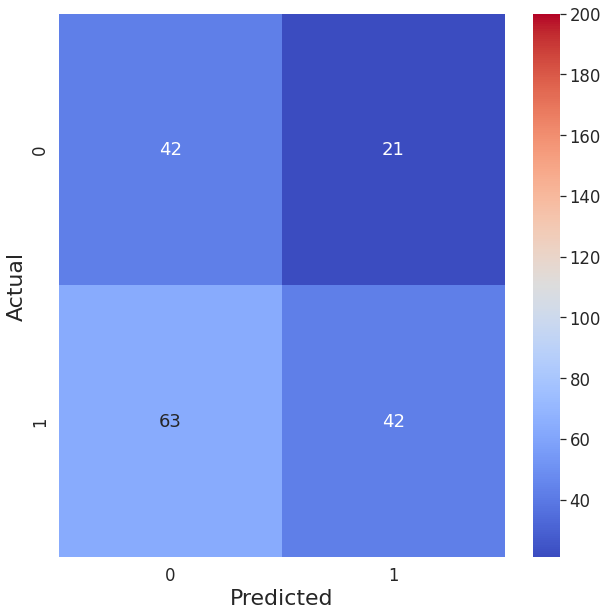

In [79]:
#confusion_matrix = pd.DataFrame.from_dict(confusion_matrix,orient='index')
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

sns.heatmap(confusion_matrix,
            cmap='coolwarm',
            annot=True,
            fmt='.5g',
            vmax=200)

plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2, 1],
       [2, 3]])

## Accuracy Score

In [ ]:

def accuracy_Score(y_test,y_pred):
  confusion_matrix = confusion_Matrix(y_test,y_pred)
  accuracy = (confusion_matrix['True negative'] +confusion_matrix['True positive'])/len(y_test)
  return accuracy

In [ ]:
accuracy_Score(y_test,y_pred)

1.875

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.625

## Precision 

In [ ]:
def precision(y_test,y_pred):
  confusion_matrix = confusion_Matrix(y_test,y_pred)
  precision = confusion_matrix['True positive']/(confusion_matrix['True positive'] + confusion_matrix['False positive'])
  return precision

In [ ]:
precision(y_test,y_pred)

0.75

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test,y_pred)

0.75

## Recall

In [ ]:
def recall(y_test,y_pred):
  confusion_matrix = confusion_Matrix(y_test,y_pred)
  recall = confusion_matrix['True positive']/(confusion_matrix['True positive'] + confusion_matrix['False negative'])
  return recall

In [ ]:
recall(y_test,y_pred)

0.6

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test,y_pred)

0.6

## F1 score

In [ ]:
def f1_score(y_test,y_pred):
  precision_ = precision(y_test,y_pred)
  recall_ = recall(y_test,y_pred)
  f1_score = (2* precision_ * recall_)/(precision_ +recall_)
  return f1_score

In [ ]:
f1_score(y_test,y_pred)

0.6666666666666665

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.6666666666666665

## Plotting points on AUC curve:

In ROC curve shows the relationship between clinical sensitivity and specificity for every possible cut-off. The ROC curve is a graph with:

The x-axis showing 1 – specificity (= false positive fraction = FP/(FP+TN)) <br>
The y-axis showing sensitivity (= true positive fraction = TP/(TP+FN))

In [61]:
def roc(y_test,y_pred):
  confusion_matrix = confusion_Matrix(y_test,y_pred)
  roc_x = confusion_matrix['False positive']/ (confusion_matrix['False positive'] + confusion_matrix['True negative'])
  roc_y = confusion_matrix['True negative']/ (confusion_matrix['False positive'] + confusion_matrix['True negative'])
  threshold = [0.001,0.0002,0.00001,0.0001,0.0001]
  plt.plot(roc_x, roc_y)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  var =  plt.show()
  return var

In [62]:
roc(y_test,y_pred)

NameError: ignored

In [ ]:
from sklearn .metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)

0.6333333333333334
